In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
import matplotlib.pyplot as plt

<AxesSubplot:>

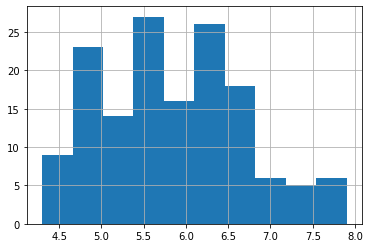

In [11]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

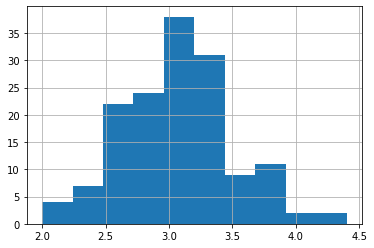

In [12]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

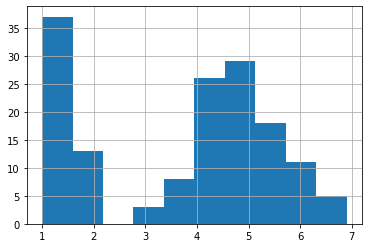

In [13]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

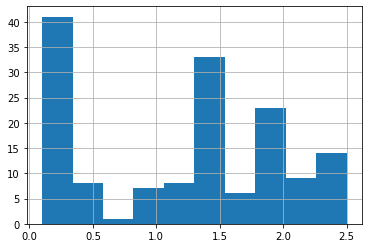

In [14]:
df['PetalWidthCm'].hist()

In [15]:
colors = ['blue','green','yellow']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

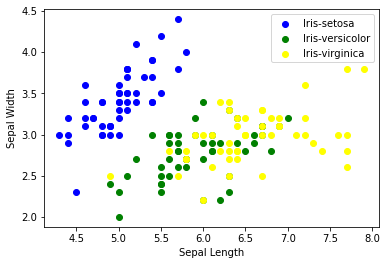

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()    

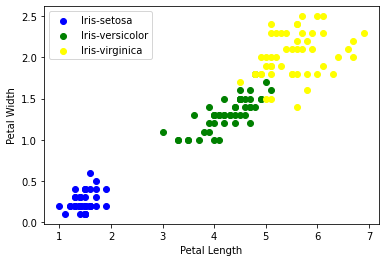

In [17]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()    

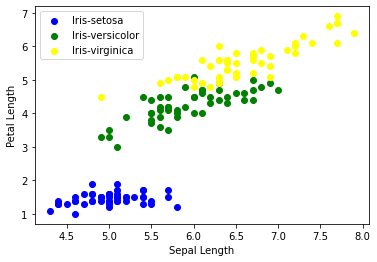

In [18]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()    

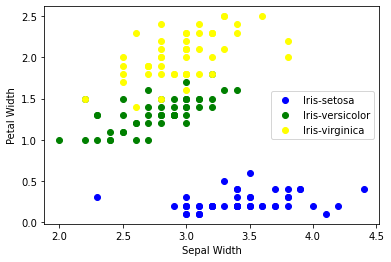

In [19]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()    

In [20]:
import seaborn as sns

<AxesSubplot:>

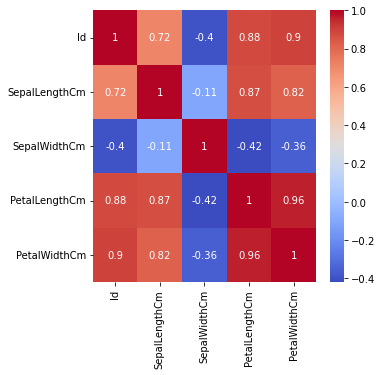

In [22]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

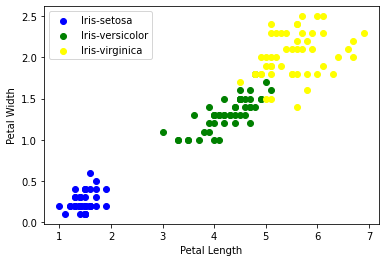

In [23]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()    

In [24]:
#label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [109]:
#Model Training
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.50)

In [110]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [111]:
model.fit(x_train, y_train)

C:\Users\chsur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  98.66666666666667


In [113]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [114]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [115]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [116]:
#DESCISION TREE
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [117]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [118]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  98.66666666666667
